TO ADD/TRY:
* minimax + heuristic
* move ordering
* store board as bits

PROCESS
* make search
* test a few moves
* [test against unbeatable site](https://connect4.gamesolver.org/en/)

empty board and visualize board helper function

In [1]:
# Visualization code by Randolph Rankin
import matplotlib.pyplot as plt
import numpy as np
import math

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

actions, result, terminal, checkwin, utility, other player helper functions

In [2]:
#returns possible moves using move ordering
def actions(s):
    #get not full collumns
    actions = np.where(np.array(s[0])==0)[0].tolist()
    #prioritize center columns
    priority = [1,2,3,4,3,2,1]
    priority = [priority[i] for i in actions]

    return [a for _,a in sorted(zip(priority,actions), reverse=True)]
    
#updates board with move
def result(s, p, a):
    #check if column is full
    if(s[0][a] != 0):
        print("Error: Illegal move!")
    #copy board
    board = np.copy(s)
    #find lowest row
    lowestRow=0
    for lowestRow in range(len(board)):
        #if player disc is found
        if(board[lowestRow][a]!=0):
            #place player disc one above current disc
            board[lowestRow-1][a]=p
            #return board   
            return board
    #place player disc on lowest row
    board[lowestRow][a]=p
    #return board   
    return board

#checks if the board is full
def terminal(s):
    #search board and check if it is full
    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] ==0: return False
    return True

#checks if a player has won
def check_win(s):
    #copy board
    board = np.copy(s)
    #search board
    for i in range(len(board)):
        for j in range(len(board[0])):
            #check vertical
            if not i + 3 >= len(board) and board[i][j]  == board[i+1][j] == board[i+2][j] == board[i+3][j] !=0:
                return board[i][j]
            #check horizontal
            if not j + 3 >= len(board[0]) and board[i][j]  == board[i][j+1] == board[i][j+2] == board[i][j+3] !=0:
                return board[i][j]
            #check diagonal
            if not j + 3 >= len(board[0]) and not i + 3 >= len(board) and board[i][j] == board[i+1][j + 1] == board[i+2][j + 2] == board[i+3][j + 3] !=0:
                return board[i][j]
            #check reverse diagonal
            if not j - 3 < 0 and not i + 3 >= len(board)and board[i][j] == board[i+1][j - 1] == board[i+2][j - 2] == board[i+3][j - 3] !=0:
                return board[i][j]
    #return 0 if no winner
    return 0

#checks for winner/tie/game not over
def utility(s, player = 1):
    #check if either player won
    goal = check_win(s)
    if goal == player: return +1 
    if goal == other(player): return -1
    #check if board is full
    draw = terminal(s)
    if draw: return 0
    #if game is not over
    return None

#gets non active user
def other(player): 
    if player == 1: return -1
    else: return 1

random player for testing

## minimax + heuristics

heuristic function

* 4 in a row DONE
* 3 in a row
    * move can be made on either side of 3 in row (ex. [0, 1, 1, 1, 0]) WIN - infinity
    * move can be made on only side of 3 in row (ex. [-1, 1, 1, 1, 0]) BIG + - 900k
    * there are 2 with a gap then 1 (ex. [1, 0, 1, 1]) BIG + - 900k
    * move can't be made on either side of 3 in row (ex. [-1, 1, 1, 1,-1]) +0 includes non-immediate moves?
* 2 in a row
    * move can be made on either side of 2 in row (ex. [0, 1, 1, 0]) BIG + - 50k
    * move can be made on only side of 2 in row (ex. [-1, 1, 1, 0]) BIG + - 10k includes non-immediate moves
        * increase for each available square up to 40k
* 1 on its own
    * add small score based on its column position
    
* DONE 4 in a row
* 3 in a row
    * DONE move can be made on either side of 3 in row (ex. [0, 1, 1, 1, 0]) WIN - infinity
    * DONE move can be made on only side of 3 in row (ex. [-1, 1, 1, 1, 0]) BIG + - 900k
    * DONE there are 2 with a gap then 1 (ex. [1, 0, 1, 1]) BIG + - 900k
    * DONE move can't be made on either side of 3 in row (ex. [-1, 1, 1, 1,-1]) +0 includes non-immediate moves?
* 2 in a row
    * DONE move can be made on either side of 2 in row (ex. [0, 1, 1, 0]) BIG + - 50k
    * DONE move can be made on only side of 2 in row (ex. [-1, 1, 1, 0]) BIG + - 10k includes non-immediate moves
        * increase for each available square up to 40k
* 1 on its own
    * add small score based on its column position

In [3]:
def check_horizontal(board, player, r, c):
    score = 0
    #check horizontal for 3 in a row
    if not c + 2 >= len(board[0]):
        #get row
        row = np.array([board[r][c], board[r][c+1], board[r][c+2]])
        #check for 3 in a row for player
        if sum(row == player) == 3:
            #check if before and after 3 is empty [0,1,1,1,0]
            if (c>0 and board[r][c-1]==0) and (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                return player, False
            #check if before 3 is empty [0,1,1,1]
            elif (c>0 and board[r][c-1]==0):
                score+=.009
            #check if after 3 is empty [1,1,1,0]
            elif (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                score+=.009           
        #check for 3 in a row for other player       
        elif sum(row == other(player)) == 3:
            #check if before and after 3 is empty [0,1,1,1,0]
            if (c>0 and board[r][c-1]==0) and (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                return other(player), False
            #check if before 3 is empty [0,1,1,1]
            elif (c>0 and board[r][c-1]==0):
                score-=.009
            #check if after 3 is empty [1,1,1,0]
            elif (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                score-=.009          
    #check horizontal for 2 in a row
    if not c + 1 >= len(board[0]):
        #get row
        row = np.array([board[r][c], board[r][c+1]])
        #check for 2 in a row
        if sum(row == player) == 2:
            #make sure its not 3 in a row
            if not (c>0 and board[r][c-1]==player) and not (not c + 2 >= len(board[0]) and board[r][c+2]==player):
                #check if before and after 2 is empty [0,1,1,0]
                if (c>0 and board[r][c-1]==0) and (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                    #check if next before is same player [1,0,1,1,0]
                    if (c>1 and board[r][c-2]==player):
                        score+=.009
                    #check if next after is same player [0,1,1,0,1]
                    elif (not c + 3 >= len(board[0]) and board[r][c+3]==player):
                        score+=.009
                    else: score+=.0005
                #check if before 2 is empty [0,1,1]
                elif (c>0 and board[r][c-1]==0):
                    #check if next before is same player [1,0,1,1]
                    if (c>1 and board[r][c-2]==player):
                        score+=.009
                    else: score+=.0001
                #check if after 2 is empty [1,1,0]
                elif (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                    #check if next after is same player [1,1,0,1]
                    if (not c + 3 >= len(board[0]) and board[r][c+3]==player):
                        score+=.009
                    else: score+=.0001           
        #check for 2 in a row for other player
        elif sum(row == other(player)) == 2:
            #make sure its not 3 in a row
            
            
            
            #TODO TODO TODO DOUBLE CHECK THIS NOT             \/
            if not (c>0 and board[r][c-1]==other(player)) and not (not c + 2 >= len(board[0]) and board[r][c+2]==other(player)):
                #check if before and after 2 is empty [0,1,1,0]
                if (c>0 and board[r][c-1]==0) and (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                    #check if next before is same player [1,0,1,1,0]
                    if (c>1 and board[r][c-2]==other(player)):
                        score-=.009
                    #check if next after is same player [0,1,1,0,1]
                    elif (not c + 3 >= len(board[0]) and board[r][c+3]==other(player)):
                        score-=.009
                    else: score-=.0005
                #check if before 2 is empty [0,1,1]
                elif (c>0 and board[r][c-1]==0):
                    #check if next before is same player [1,0,1,1]
                    if (c>1 and board[r][c-2]==other(player)):
                        score-=.009
                    else: score-=.0001
                #check if after 2 is empty [1,1,0]
                elif (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                    #check if next after is same player [1,1,0,1]
                    if (not c + 3 >= len(board[0]) and board[r][c+3]==other(player)):
                        score-=.009
                    else: score-=.0001
                        
                        
                        
                    
    return score, False

In [4]:
def check_alone(board, player, r, c):
    #check top left row
    if r>0 and c>0 and board[r-1][c-1]==player:
        return 0
    #check top middle row    
    if r>0 and board[r-1][c]==player:
        return 0
    #check top right row
    if r>0 and not c + 1 >= len(board[0]) and board[r-1][c+1]==player:
        return 0
    #check left
    if c>0 and board[r][c-1]==player:
        return 0
    #check right
    if not c + 1 >= len(board[0]) and board[r][c+1]==player:
        return 0
    #check bottom left row
    if not r + 1 >= len(board) and c>0 and board[r+1][c-1]==player:
        return 0
    #check bottom middle row
    if not r + 1 >= len(board) and board[r+1][c]==player:
        return 0
    #check bottom left row
    if not r + 1 >= len(board) and  not c + 1 >= len(board[0]) and board[r+1][c+1]==player:
        return 0   
    #if alone, return value based on column position
    if c==3: return .000002
    elif c==2 or c==4: return .0000012
    elif c==1 or c==5: return .0000007
    elif c==0 or c==6: return .0000004

In [5]:
#TODO maybe add scores for more spaces after 2 in a row

def eval_fun(board, player):
    
    # terminal state? aka 4 in a row
    u = utility(board, player)
    if u is not None: return u, True
      
    score = 0
    #go through board
    for r in range(len(board)):
        for c in range(len(board[0])):
#DIAGONAL CHECK
            #check diagonal for 3 in a row
            if not r + 2 >= len(board) and not c + 2 >= len(board[0]):
                #get row
                row = np.array([board[r][c], board[r+1][c+1], board[r+2][c+2]])
                #check for 3 in a row for player
                if sum(row == player) == 3:
                    #check if before and after 3 is empty [0,1,1,1,0]
                    if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                        return player, False
                    #check if before 3 is empty [0,1,1,1]
                    elif (c>0 and r>0 and board[r-1][c-1]==0):
                        score+=.009
                    #check if after 3 is empty [1,1,1,0]
                    elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                        score+=.009           
                #check for 3 in a row for other player       
                elif sum(row == other(player)) == 3:
                    #check if before and after 3 is empty [0,1,1,1,0]
                    if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                        return other(player), False
                    #check if before 3 is empty [0,1,1,1]
                    elif (c>0 and r>0 and board[r-1][c-1]==0):
                        score-=.009
                    #check if after 3 is empty [1,1,1,0]
                    elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                        score-=.009    
            #check diagonal for 2 in a row
            if not r + 1 >= len(board) and not c + 1 >= len(board[0]):
                #get row
                row = np.array([board[r][c], board[r+1][c+1]])
                #check for 2 in a row
                if sum(row == player) == 2:
                    #make sure its not 3 in a row
                    if not (c>0 and r>0 and board[r-1][c-1]==player) and not (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==player):
                        #check if before and after 2 is empty [0,1,1,0]
                        if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                            #check if next before is same player [1,0,1,1,0]
                            if (c>1 and r>1 and board[r-2][c-2]==player):
                                score+=.009
                            #check if next after is same player [0,1,1,0,1]
                            elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==player):
                                score+=.009
                            else: score+=.0005
                        #check if before 2 is empty [0,1,1]
                        elif (c>0 and r>0 and board[r-1][c-1]==0):
                            #check if next before is same player [1,0,1,1]
                            if (c>1 and r>1 and board[r-2][c-2]==player):
                                score+=.009
                            else: score+=.0001
                        #check if after 2 is empty [1,1,0]
                        elif (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                            #check if next after is same player [1,1,0,1]
                            if (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==player):
                                score+=.009
                            else: score+=.0001   
                #check for 2 in a row for other player
                elif sum(row == other(player)) == 2:
                    #make sure its not 3 in a row
                    if not (c>0 and r>0 and board[r-1][c-1]==other(player)) and not (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==other(player)):
                        #check if before and after 2 is empty [0,1,1,0]
                        if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                            #check if next before is same player [1,0,1,1,0]
                            if (c>1 and r>1 and board[r-2][c-2]==other(player)):
                                score-=.009
                            #check if next after is same player [0,1,1,0,1]
                            elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==other(player)):
                                score-=.009
                            else: score-=.0005
                        #check if before 2 is empty [0,1,1]
                        elif (c>0 and r>0 and board[r-1][c-1]==0):
                            #check if next before is same player [1,0,1,1]
                            if (c>1 and r>1 and board[r-2][c-2]==other(player)):
                                score-=.009
                            else: score-=.0001
                        #check if after 2 is empty [1,1,0]
                        elif (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                            #check if next after is same player [1,1,0,1]
                            if (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==other(player)):
                                score-=.009
                            else: score-=.0001
#REVERSE DIAGONAL CHECK
            #check diagonal for 3 in a row
            if not r + 2 >= len(board) and c>1:
                #get row
                row = np.array([board[r][c], board[r+1][c-1], board[r+2][c-2]])
                #check for 3 in a row for player
                if sum(row == player) == 3:
                    #check if before and after 3 is empty [0,1,1,1,0]
                    if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                        return player, False
                    #check if before 3 is empty [0,1,1,1]
                    elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                        score+=.009
                    #check if after 3 is empty [1,1,1,0]
                    elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                        score+=.009
                #check for 3 in a row for other player
                elif sum(row == other(player)) == 3:
                    #check if before and after 3 is empty [0,1,1,1,0]
                    if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                        return other(player), False
                    #check if before 3 is empty [0,1,1,1]
                    elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                        score-=.009
                    #check if after 3 is empty [1,1,1,0]
                    elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                        score-=.009  
            #check diagonal for 2 in a row
            if not r + 1 >= len(board) and c>0:
                #get row
                row = np.array([board[r][c], board[r+1][c-1]])
                #check for 2 in a row
                if sum(row == player) == 2:
                    #make sure its not 3 in a row
                    if not (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==player) and not (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==player):
                        #check if before and after 2 is empty [0,1,1,0]
                        if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                            #check if next before is same player [1,0,1,1,0]
                            if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==player):
                                score+=.009
                            #check if next after is same player [0,1,1,0,1]
                            elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==player):
                                score+=.009
                            else: score+=.0005
                        #check if before 2 is empty [0,1,1]
                        elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                            #check if next before is same player [1,0,1,1]
                            if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==player):
                                score+=.009
                            else: score+=.0001
                        #check if after 2 is empty [1,1,0]
                        elif (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                            #check if next after is same player [1,1,0,1]
                            if (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==player):
                                score+=.009
                            else: score+=.0001  
                #check for 2 in a row for other player
                elif sum(row == other(player)) == 2:
                    #make sure its not 3 in a row
                    if not (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==other(player)) and not (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==other(player)):
                        #check if before and after 2 is empty [0,1,1,0]
                        if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                            #check if next before is same player [1,0,1,1,0]
                            if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==other(player)):
                                score-=.009
                            #check if next after is same player [0,1,1,0,1]
                            elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==other(player)):
                                score-=.009
                            else: score-=.0005
                        #check if before 2 is empty [0,1,1]
                        elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                            #check if next before is same player [1,0,1,1]
                            if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==other(player)):
                                score-=.009
                            else: score-=.0001
                        #check if after 2 is empty [1,1,0]
                        elif (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                            #check if next after is same player [1,1,0,1]
                            if (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==other(player)):
                                score-=.009
                            else: score-=.0001
#VERTICAL CHECK
            #check vertical for 3 in a row
            if not r + 2 >= len(board):
                #get row
                row = np.array([board[r][c], board[r+1][c], board[r+2][c]])
                #check for 3 in a row for player and before 3 is empty [0,1,1,1]
                if sum(row == player) == 3 and r>0 and board[r-1][c]==0:
                    score+=.009
                #check for 3 in a row for other player and before 3 is empty [0,1,1,1]
                elif sum(row == other(player)) == 3 and r>0 and board[r-1][c]==0:
                    score-=.009                              
            #check vertical for 2 in a row
            if not r + 1 >= len(board):
                #get row
                row = np.array([board[r][c], board[r+1][c]])
                #check for 2 in a row
                if sum(row == player) == 2:
                    #make sure its not 3 in a row
                    if not (r>0 and board[r-1][c]==player) and not (not r + 2 >= len(board) and board[r+2][c]==player):
                        #make sure before is empty
                        if r>0 and board[r-1][c]==0:
                            score+=.0001
                #check for 2 in a row for other player
                elif sum(row == other(player)) == 2:
                    #make sure its not 3 in a row
                    if not (r>0 and board[r-1][c]==other(player)) and not (not r + 2 >= len(board) and board[r+2][c]==other(player)):
                        #make sure before is empty
                        if r>0 and board[r-1][c]==0:
                            score-=.0001
#HORIZONTAL CHECK
            #check horizontal for 3 in a row
            if not c + 2 >= len(board[0]):
                #get row
                row = np.array([board[r][c], board[r][c+1], board[r][c+2]])
                #check for 3 in a row for player
                if sum(row == player) == 3:
                    #check if before and after 3 is empty [0,1,1,1,0]
                    if (c>0 and board[r][c-1]==0) and (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                        return player, False
                    #check if before 3 is empty [0,1,1,1]
                    elif (c>0 and board[r][c-1]==0):
                        score+=.009
                    #check if after 3 is empty [1,1,1,0]
                    elif (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                        score+=.009           
                #check for 3 in a row for other player       
                elif sum(row == other(player)) == 3:
                    #check if before and after 3 is empty [0,1,1,1,0]
                    if (c>0 and board[r][c-1]==0) and (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                        return other(player), False
                    #check if before 3 is empty [0,1,1,1]
                    elif (c>0 and board[r][c-1]==0):
                        score-=.009
                    #check if after 3 is empty [1,1,1,0]
                    elif (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                        score-=.009          
            #check horizontal for 2 in a row
            if not c + 1 >= len(board[0]):
                #get row
                row = np.array([board[r][c], board[r][c+1]])
                #check for 2 in a row
                if sum(row == player) == 2:
                    #make sure its not 3 in a row
                    if not (c>0 and board[r][c-1]==player) and not (not c + 2 >= len(board[0]) and board[r][c+2]==player):
                        #check if before and after 2 is empty [0,1,1,0]
                        if (c>0 and board[r][c-1]==0) and (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                            #check if next before is same player [1,0,1,1,0]
                            if (c>1 and board[r][c-2]==player):
                                score+=.009
                            #check if next after is same player [0,1,1,0,1]
                            elif (not c + 3 >= len(board[0]) and board[r][c+3]==player):
                                score+=.009
                            else: score+=.0005
                        #check if before 2 is empty [0,1,1]
                        elif (c>0 and board[r][c-1]==0):
                            #check if next before is same player [1,0,1,1]
                            if (c>1 and board[r][c-2]==player):
                                score+=.009
                            else: score+=.0001
                        #check if after 2 is empty [1,1,0]
                        elif (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                            #check if next after is same player [1,1,0,1]
                            if (not c + 3 >= len(board[0]) and board[r][c+3]==player):
                                score+=.009
                            else: score+=.0001           
                #check for 2 in a row for other player
                elif sum(row == other(player)) == 2:
                    #make sure its not 3 in a row
                    if not (c>0 and board[r][c-1]==other(player)) and not (not c + 2 >= len(board[0]) and board[r][c+2]==other(player)):
                        #check if before and after 2 is empty [0,1,1,0]
                        if (c>0 and board[r][c-1]==0) and (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                            #check if next before is same player [1,0,1,1,0]
                            if (c>1 and board[r][c-2]==other(player)):
                                score-=.009
                            #check if next after is same player [0,1,1,0,1]
                            elif (not c + 3 >= len(board[0]) and board[r][c+3]==other(player)):
                                score-=.009
                            else: score-=.0005
                        #check if before 2 is empty [0,1,1]
                        elif (c>0 and board[r][c-1]==0):
                            #check if next before is same player [1,0,1,1]
                            if (c>1 and board[r][c-2]==other(player)):
                                score-=.009
                            else: score-=.0001
                        #check if after 2 is empty [1,1,0]
                        elif (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                            #check if next after is same player [1,1,0,1]
                            if (not c + 3 >= len(board[0]) and board[r][c+3]==other(player)):
                                score-=.009
                            else: score-=.0001
#ALONE CHECK
#            #check if square is not connected
#            if board[r][c]!=0:
#                score+=check_alone(board, player, r, c)
#                score-=check_alone(board, other(player), r, c)
    #return final score
    return score, False

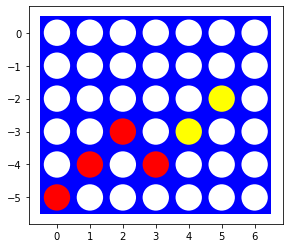

(0.009399999999999999, False)


In [6]:

            
board = [[ 0, 0, 0, 0, 0, 0, 0],
         [ 0, 0, 0, 0, 0, 0, 0],
         [ 0, 0, 0, 0, 0,-1, 0],
         [ 0, 0, 1, 0,-1, 0, 0],
         [ 0, 1, 0, 1, 0, 0, 0],
         [ 1, 0, 0, 0, 0, 0, 0]]
visualize(board)
print(eval_fun(board,1))

minimax with heuristic and cutoff

In [7]:
class Heuristic_ab_search:
    def __init__(self, player, heuristic, cutoff = 5, debug=2):
        self.player= player
        self.heuristic = heuristic
        self.cutoff = cutoff
        self.count = 0
        self.debug= debug # 1 ... count nodes, 2 ... debug each node
    
    def find_move(self, board):
        """start the search. cutoff = None is minimax search with alpha-beta pruning."""
        self.count = 0

        value, move = self.max_value_ab(board, -math.inf, +math.inf, 0)

        if self.debug >= 1: print(f"Number of nodes searched (cutoff = {self.cutoff}): {self.count}") 

        return {"move": move, "value": value}

    def max_value_ab(self, state, alpha, beta, depth):
        """player's best move."""
        self.count += 1

        # cut off and terminal test
        v, terminal = self.heuristic(state, self.player)
        if((self.cutoff is not None and depth >= self.cutoff) or terminal): 
            if(terminal): 
                alpha, beta = v, v
            if self.debug >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
            return v, None

        v, move = -math.inf, None

        # check all possible actions in the state, update alpha and return move with the largest value
        for a in actions(state):
            v2, a2 = self.min_value_ab(result(state, self.player, a), alpha, beta, depth + 1)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta: return v, move

        return v, move

    def min_value_ab(self, state, alpha, beta, depth):
        """opponent's best response."""
        self.count += 1

        # cut off and terminal test
        v, terminal = self.heuristic(state, self.player)
        if((self.cutoff is not None and depth >= self.cutoff) or terminal): 
            if(terminal): 
                alpha, beta = v, v
            if self.debug >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
            return v, None

        v, move = +math.inf, None

        # check all possible actions in the state, update beta and return move with the smallest value
        for a in actions(state):
            v2, a2 = self.max_value_ab(result(state, other(self.player), a), alpha, beta, depth + 1)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha: return v, move

        return v, move

## Testing

### first move

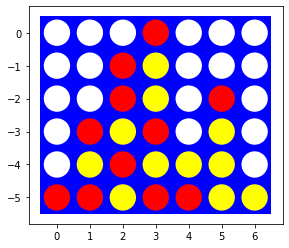

Number of nodes searched (cutoff = 5): 47


{'move': 4, 'value': -1}

CPU times: total: 46.9 ms
Wall time: 47 ms


In [8]:
board = [[ 0, 0, 0, 1, 0, 0, 0],
         [ 0, 0, 1,-1, 0, 0, 0],
         [ 0, 0, 1,-1, 0, 1, 0],
         [ 0, 1,-1, 1, 0,-1, 0],
         [ 0,-1, 1,-1,-1,-1, 0],
         [ 1, 1,-1, 1, 1,-1,-1]]
visualize(board)

red_move=Heuristic_ab_search(player=1, heuristic=eval_fun, cutoff=5, debug=1)
%time display(red_move.find_move(board))

## game time

In [9]:
def random_player(board, player = 1):
    return np.random.choice(actions(board))

game environment

In [10]:
def switch_player(player, red, yellow):
    if player == 1:
        return -1, yellow
    else:
        return 1, red

def play(red, yellow, N = 1000):
    results = {1: 0, -1: 0, 'd': 0}
    for i in range(N):
        board = empty_board()
        player, fun = 1, red
        while True:
            #check if board is full
            if terminal(board):
                results['d']+=1
                visualize(board)
                break
            #get move  
            a = fun(board, player)
            board = result(board, player, a)
            #check if player won
            win = check_win(board)
            if win != 0:
                results[win] += 1
                visualize(board)
                break

            player, fun = switch_player(player, red, yellow)   
    return results

In [11]:
def heuristic_player(board, player = 1, heuristic=eval_fun, cutoff=5, debug=0):
    heuristic_player=Heuristic_ab_search(player=player, heuristic=heuristic, cutoff=cutoff, debug=debug)
    return heuristic_player.find_move(board)["move"]

	heuristic vs. random:


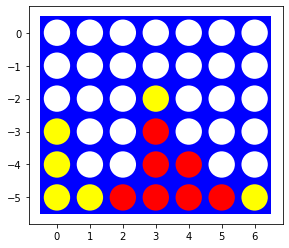

{1: 1, -1: 0, 'd': 0}

CPU times: total: 13.4 s
Wall time: 13.4 s


In [12]:
print("\theuristic vs. random:")
%time display(play(heuristic_player, random_player, N=1))

## Game time with Pure Monte Carlo Search

In [13]:
class PMCS:
    def __init__(self, player, N=10, debug=2):
        self.player= player
        self.N = N
        self.debug= debug

    def find_move(self, board):
        """Pure Monte Carlo Search. Returns the action that has the largest average utility.
        The N playouts are evenly divided between the possible actions."""

        acts = actions(board)
        n = math.floor(self.N/len(acts))
        if self.debug >= 1: print(f"Actions: {acts} ({n} playouts per action)")

        ps = { i : np.mean(self.playouts(board, i)) for i in acts }
        if self.debug >= 1: display(ps)

        action = max(ps, key=ps.get)
        return action
    
    def playouts(self, board, action):
        """Perform N playouts following the given action for the given board."""
        return [ self.playout(board, action) for i in range(self.N) ]
    
    def playout(self, state, action):
        """Perfrom a random playout starting with the given action on the given board 
        and return the utility of the finished game."""
        state = result(state, self.player, action)
        current_player = other(self.player)

        while(True):
            # reached terminal state?
            u = utility(state, self.player)
            if u is not None: return(u)

            # we use a random playout policy
            a = np.random.choice(actions(state))
            state = result(state, current_player, a)
            #print(state)

            # switch between players
            current_player = other(current_player)

In [17]:
def pmcs_player(board, player = 1, N=100, debug=0):
    pmcs_play=PMCS(player=player, N=N, debug=debug)
    return pmcs_play.find_move(board)

def heuristic_player(board, player = 1, heuristic=eval_fun, cutoff=6, debug=0):
    heuristic_player=Heuristic_ab_search(player=player, heuristic=heuristic, cutoff=cutoff, debug=debug)
    return heuristic_player.find_move(board)["move"]

	heuristic vs. pmcs:


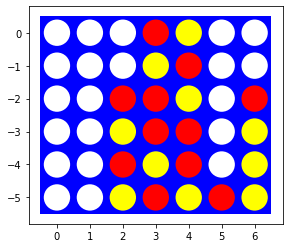

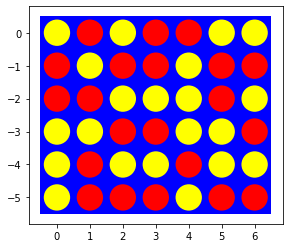

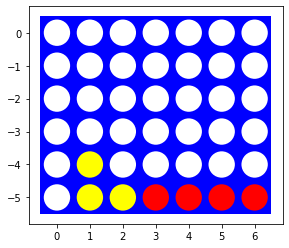

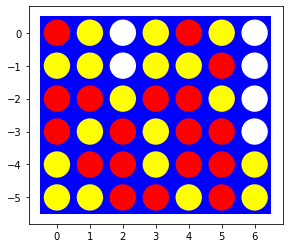

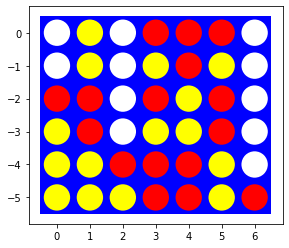

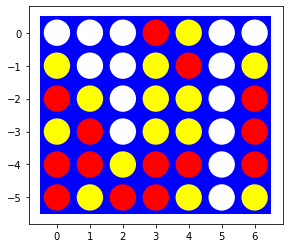

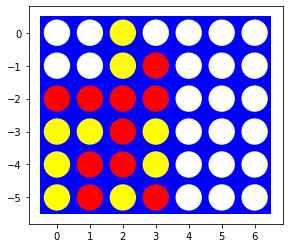

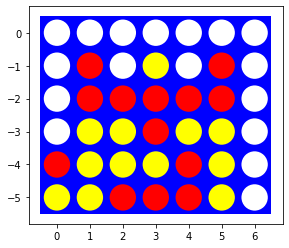

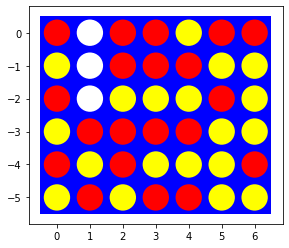

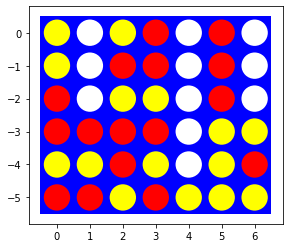

{1: 7, -1: 2, 'd': 1}

CPU times: total: 17min 30s
Wall time: 17min 30s


In [18]:
print("\theuristic vs. pmcs:")
%time display(play(heuristic_player, pmcs_player, N=10))

	pmcs vs. heuristic:


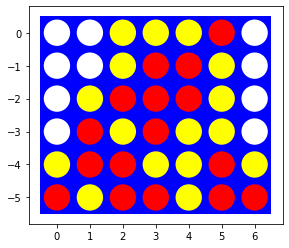

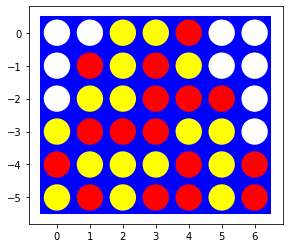

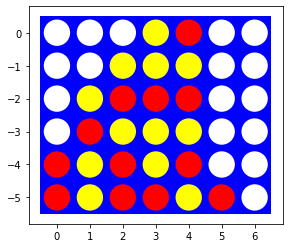

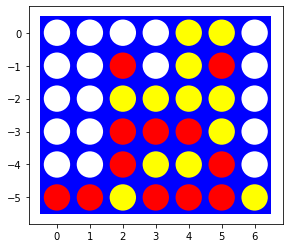

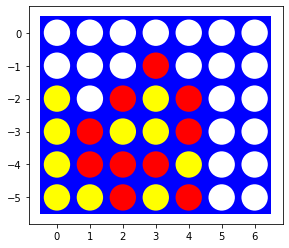

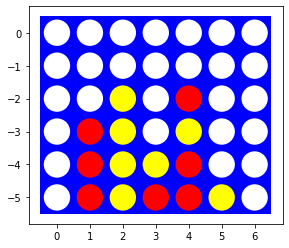

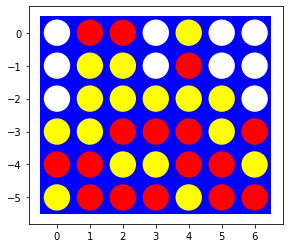

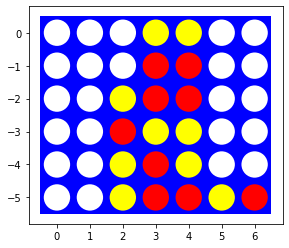

In [ ]:
print("\tpmcs vs. heuristic:")
%time display(play(pmcs_player, heuristic_player, N=10))